In [124]:
import pandas as pd
import numpy as np

# jak to kategoryzowa czy git czy nie?
# jak do remontu to kamienica dupa
# pytania w GUI: l. pokoi, stan wykonczenia, 

In [125]:
data = pd.read_csv('./oferty.csv')
data = data.drop_duplicates()
data.head()

,nazwa_ogloszenia,cena,opis,lokalizacja,zametr,pokoje,powierzchnia,umeblowane,czynsz,rodzaj zabudowy,rynek,piętro,typ,forma wlasnosci,stan wykonczenia,balkon/ogrod/taras,miejsce parkingowe,ogrzewanie
0,2 pokoje z balkonem w Centrum!,640 000 zł,"Na sprzedaż 2 pokojowe mieszkanie z balkonem w ścisłym centrum Wrocławia.\n\nMieszkanie w pełni rozkładowe 50m2 :\n\n1 pokój dzienny około 20m2\n1 sypialnia około 15m2\nGarderoba\nŁazienka\nKuchnia\n\nMedia:\n\nogrzewanie - sieć miejska\nwoda - piec jednofunkcyjny gazowy\nczynsz- 560 zł ( w tym są już wszystkie zaliczki)\nosobno płatny prąd i gaz ( podgrzanie wody oraz kuchenka)\n\nMieszkanie mieści się na 2 piętrze w budynku bez windy, blok z lat 70. Osiedle jest ogrodzone i zamknięte. Możliwość parkowania na osiedlu tylko dla mieszkańców.\nDodatkowo do mieszkania przynależy piwnica.\nLokal został odświeżony 3 miesiące temu, nie wymaga dodatkowych nakładów finansowych.\nNa chwilę obecną mieszkanie jest wynajmowane, lokatorzy są chętni na jego kontynuowanie :)\n\nLokalizacja nieruchomości ul. Dworcowa\n\nPośredników zapraszam z klientami, nie podpisuję żadnych umów(chyba, że przed finalizacją sprzedaży)- ofertę możecie podesłać swojemu klientowi:) Ewentualne kwestie wynagrodzenia do ustalenia:) Powiedzmy, że jestem z branży :)\n\nPo więcej szczegółów zapraszam do kontaktu.","Wrocław, Stare Miasto",12800 zł/m²,2.0,50 m²,Tak,NaN,Blok,Wtórny,2,Prywatne,NaN,NaN,NaN,NaN,NaN
1,Mieszkanie Komuny Paryskiej/Bez pośrednika/2 pokoje/47m2/piwnica,559 000 zł,"Na sprzedaż 2-pokojowe umeblowane mieszkanie o powierzchni 47m² usytuowane na 4 piętrze w bloku, przy ulicy Komuny Paryskiej we Wrocławiu.\n\nW skład lokalu wchodzi:\n\n- kuchnia z dużym oknem\n\n- pokój\n\n- salon\n\n- przedpokój\n\n- łazienka z wc\n\n- balkon\n\n- piwnica\n\n- schowek na strychu w części wspólnej\n\nMieszkanie umeblowane i wyposażone w sprzęt RTV i AGD\n\n- okna PCV\n\n- ogrzewanie miejskie\n\n- czynsz około 400zł\n\n- pełna własność z księgą wieczystą\n\n- budynek po remoncie klatki schodowej\n\nBardzo dobra lokalizacja oraz komunikacja\n\nRynek ~ 1km\n\nDworzec Główny ~ 1km\n\nLotnisko ~ 13km\n\nGaleria Dominikańska ~ 0.6km\n\nWroclavia ~ 1km\n\nŻabka ~ 150m\n\nW pobliżu apteki, sklepy spożywcze itp\n\nBlisko również przystanki komunikacji miejskiej.\n\nCena: 559 000\n\nZapraszam do kontaktu.","Wrocław, Krzyki",11893.62 zł/m²,2.0,47 m²,Tak,NaN,Blok,Wtórny,4,Prywatne,NaN,NaN,NaN,NaN,NaN
2,"Nowe Żerniki, 3 pokoje z ogromnym tarasem 77m2, wysoki standard",949 000 zł,"Na sprzedaż piękne, zaprojektowane przez architekta w wysokim standardzie 3-pokojowe mieszkanie znajdujące się na osiedlu Nowe Żerniki (WuWa2), przy ulicy Lauterbacha.\n\nBezpośrednio od właściciela - bez pośredników i BEZ PROWIZJI!\n\nMieszkanie o powierzchni 64,77m2 znajduje się na 1 piętrze i posiada duży, pięknie zagospodarowany taras.\nDo mieszkania przynależą 2 komórki lokatorski (jedna na piętrze obok mieszkania, druga obok miejsc postojowych) oraz 2 zależne miejsca parkingowe w garażu podziemnym. Na osiedlu znajdują się ogólnodostępne miejsca parkingowe blisko budynku. Dostępna jest również rowerownia. Mieszkanie jest podłączone do mediów miejskich.\n\nMieszkanie jest wykończone i składa się z:\n\n- salonu z aneksem kuchennym - 32,31 m2\n- sypialnia I - 11,43 m2\n- sypialnia II - 9,02 m2\n- przedpokój - 8,08 m2\n- łazienka - 3,93 m2\n\n- taras - 77 m2\n\nNa wszystkich oknach (z wyjątkiem salonu) zostały zamontowane plisowane rolety.\n\nWszystkie meble zrobione zostały pod wymiar, łącznie z rozkładanym stołem.\nNa podłodze położona została deska dębowa, zamontowane zostały białe drzwi lakierowane.\nW łazience instalacje podtynkowe z mieszalnikiem termostatycznym.\n\nMieszkanie posiada dużo przestrzeni do przechowywania (liczne szafy, garderobę, regały, pojemniki pod łóżkiem, szuflady)\n\nMieszkanie wykończone pod siebie, nigdy nie było wynajmowane.\n\nDo mieszkania doprowadzony jest światłowód oraz dostępnych jest multum dostawców internetu (m.in. Netia, Or

In [126]:
# czasem lokalizacja.isna(), a zametr ma lokalizacje
# zastepuje np.nan w lokalizacji zametr i usuwam zametr
data['lokalizacja'] = data['lokalizacja'].fillna(data['zametr'].where(data['zametr'].str.contains('Wrocław')))
data.loc[data['zametr'].str.contains('Wrocław'), 'zametr'] = np.nan
data['piętro'] = data['piętro'].str.lower()
data_raw = data.copy()


In [127]:
data.loc[0]

nazwa_ogloszenia                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [128]:
colnames = ['czynsz', 'cena', 'zametr', 'powierzchnia']
replace_dict = {'zł': '', 'm2': '', '/': '', ' ': ''}

data_raw[colnames] = data_raw[colnames].astype('str')
data_raw[colnames] = data_raw[colnames].applymap(lambda x: str(x).replace('zł', '').replace('m²', '').replace('/', '').replace(' ', '').replace(',', '.'))
data_raw[colnames] = data_raw[colnames].astype('float')
data_raw['zametr'] = round(data_raw['zametr'].fillna(data_raw['cena'] / data_raw['powierzchnia']), 2)
data_raw['piętro'] = data_raw['piętro'].str.replace('parter', '0')
data_raw['liczba pięter'] = data_raw['piętro'].str.extract(r'(\d+)/(\d+)')[1].astype(float)
data_raw['piętro'] = data_raw['piętro'].str.extract(r'(\d+)').astype(float)

column_moved = data_raw.columns[-1]
data_raw.insert(12, column_moved, data_raw.pop(column_moved))
data_raw.head()

,nazwa_ogloszenia,cena,opis,lokalizacja,zametr,pokoje,powierzchnia,umeblowane,czynsz,rodzaj zabudowy,rynek,piętro,liczba pięter,typ,forma wlasnosci,stan wykonczenia,balkon/ogrod/taras,miejsce parkingowe,ogrzewanie
0,2 pokoje z balkonem w Centrum!,640000.0,"Na sprzedaż 2 pokojowe mieszkanie z balkonem w ścisłym centrum Wrocławia.\n\nMieszkanie w pełni rozkładowe 50m2 :\n\n1 pokój dzienny około 20m2\n1 sypialnia około 15m2\nGarderoba\nŁazienka\nKuchnia\n\nMedia:\n\nogrzewanie - sieć miejska\nwoda - piec jednofunkcyjny gazowy\nczynsz- 560 zł ( w tym są już wszystkie zaliczki)\nosobno płatny prąd i gaz ( podgrzanie wody oraz kuchenka)\n\nMieszkanie mieści się na 2 piętrze w budynku bez windy, blok z lat 70. Osiedle jest ogrodzone i zamknięte. Możliwość parkowania na osiedlu tylko dla mieszkańców.\nDodatkowo do mieszkania przynależy piwnica.\nLokal został odświeżony 3 miesiące temu, nie wymaga dodatkowych nakładów finansowych.\nNa chwilę obecną mieszkanie jest wynajmowane, lokatorzy są chętni na jego kontynuowanie :)\n\nLokalizacja nieruchomości ul. Dworcowa\n\nPośredników zapraszam z klientami, nie podpisuję żadnych umów(chyba, że przed finalizacją sprzedaży)- ofertę możecie podesłać swojemu klientowi:) Ewentualne kwestie wynagrodzenia do ustalenia:) Powiedzmy, że jestem z branży :)\n\nPo więcej szczegółów zapraszam do kontaktu.","Wrocław, Stare Miasto",12800.00,2.0,50.00,Tak,NaN,Blok,Wtórny,2.0,NaN,Prywatne,NaN,NaN,NaN,NaN,NaN
1,Mieszkanie Komuny Paryskiej/Bez pośrednika/2 pokoje/47m2/piwnica,559000.0,"Na sprzedaż 2-pokojowe umeblowane mieszkanie o powierzchni 47m² usytuowane na 4 piętrze w bloku, przy ulicy Komuny Paryskiej we Wrocławiu.\n\nW skład lokalu wchodzi:\n\n- kuchnia z dużym oknem\n\n- pokój\n\n- salon\n\n- przedpokój\n\n- łazienka z wc\n\n- balkon\n\n- piwnica\n\n- schowek na strychu w części wspólnej\n\nMieszkanie umeblowane i wyposażone w sprzęt RTV i AGD\n\n- okna PCV\n\n- ogrzewanie miejskie\n\n- czynsz około 400zł\n\n- pełna własność z księgą wieczystą\n\n- budynek po remoncie klatki schodowej\n\nBardzo dobra lokalizacja oraz komunikacja\n\nRynek ~ 1km\n\nDworzec Główny ~ 1km\n\nLotnisko ~ 13km\n\nGaleria Dominikańska ~ 0.6km\n\nWroclavia ~ 1km\n\nŻabka ~ 150m\n\nW pobliżu apteki, sklepy spożywcze itp\n\nBlisko również przystanki komunikacji miejskiej.\n\nCena: 559 000\n\nZapraszam do kontaktu.","Wrocław, Krzyki",11893.62,2.0,47.00,Tak,NaN,Blok,Wtórny,4.0,NaN,Prywatne,NaN,NaN,NaN,NaN,NaN
2,"Nowe Żerniki, 3 pokoje z ogromnym tarasem 77m2, wysoki standard",949000.0,"Na sprzedaż piękne, zaprojektowane przez architekta w wysokim standardzie 3-pokojowe mieszkanie znajdujące się na osiedlu Nowe Żerniki (WuWa2), przy ulicy Lauterbacha.\n\nBezpośrednio od właściciela - bez pośredników i BEZ PROWIZJI!\n\nMieszkanie o powierzchni 64,77m2 znajduje się na 1 piętrze i posiada duży, pięknie zagospodarowany taras.\nDo mieszkania przynależą 2 komórki lokatorski (jedna na piętrze obok mieszkania, druga obok miejsc postojowych) oraz 2 zależne miejsca parkingowe w garażu podziemnym. Na osiedlu znajdują się ogólnodostępne miejsca parkingowe blisko budynku. Dostępna jest również rowerownia. Mieszkanie jest podłączone do mediów miejskich.\n\nMieszkanie jest wykończone i składa się z:\n\n- salonu z aneksem kuchennym - 32,31 m2\n- sypialnia I - 11,43 m2\n- sypialnia II - 9,02 m2\n- przedpokój - 8,08 m2\n- łazienka - 3,93 m2\n\n- taras - 77 m2\n\nNa wszystkich oknach (z wyjątkiem salonu) zostały zamontowane plisowane rolety.\n\nWszystkie meble zrobione zostały pod wymiar, łącznie z rozkładanym stołem.\nNa podłodze położona została deska dębowa, zamontowane zostały białe drzwi lakierowane.\nW łazience instalacje podtynkowe z mieszalnikiem termostatycznym.\n\nMieszkanie posiada dużo przestrzeni do przechowywania (liczne szafy, garderobę, regały, pojemniki pod łóżkiem, szuflady)\n\nMieszkanie wykończone pod siebie, nigdy nie było wynajmowane.\n\nDo mieszkania doprowadzony jest światłowód oraz dostępnych jest multum dostawców internetu (m.in

In [129]:
data_raw['stan wykonczenia'].value_counts(dropna=False)

stan wykonczenia
NaN                55
do zamieszkania    43
do wykończenia     10
do remontu          6
Name: count, dtype: int64

In [130]:
data_raw['ulica'] = np.where(data_raw['lokalizacja'].str.contains('ul.'),
                             data_raw['lokalizacja'].str.extract(r'ul\.(.*?),', expand=False),
                             np.nan)

# Run the second line only for rows where 'ulica' is NaN
mask = data_raw['ulica'].isna()
data_raw.loc[mask, 'ulica'] = np.where(
    data_raw.loc[mask, 'nazwa_ogloszenia'].str.contains('ul.'),
    data_raw.loc[mask, 'nazwa_ogloszenia'].str.extract(r'ul\.(.*?),', expand=False),
    np.nan
)
data_raw[['ulica', 'lokalizacja', 'nazwa_ogloszenia']].loc[24]

ulica                                                             Zwycięska
lokalizacja         ul. Zwycięska, Partynice, Krzyki, Wrocław, dolnośląskie
nazwa_ogloszenia          Zainwestuj w apartament - Partynice ul. Zwycięska
Name: 24, dtype: object

In [131]:
ulica_pattern = r'ul\. (.*?)[\n)().,]'

# Extract the information between 'ul.' and the specified signs
data_raw['ulica_opis'] = data_raw['opis'].str.extract(ulica_pattern, expand=False)
data_raw['ulica_opis'] = data_raw['ulica_opis'].str.replace(r'(ej|iej|ą)$', 'a', regex=True)
data_raw['ulica'] = data_raw['ulica'].fillna(data_raw['ulica_opis'].str.split(' ').str[0]) 
data_raw.drop(columns='ulica_opis', inplace=True)
# najczesciej jak pokoje.isna() to 1
data_raw.insert(4, 'ulica', data_raw.pop('ulica'))
data_raw.head(1)


,nazwa_ogloszenia,cena,opis,lokalizacja,ulica,zametr,pokoje,powierzchnia,umeblowane,czynsz,rodzaj zabudowy,rynek,piętro,liczba pięter,typ,forma wlasnosci,stan wykonczenia,balkon/ogrod/taras,miejsce parkingowe,ogrzewanie
0,2 pokoje z balkonem w Centrum!,640000.0,"Na sprzedaż 2 pokojowe mieszkanie z balkonem w ścisłym centrum Wrocławia.\n\nMieszkanie w pełni rozkładowe 50m2 :\n\n1 pokój dzienny około 20m2\n1 sypialnia około 15m2\nGarderoba\nŁazienka\nKuchnia\n\nMedia:\n\nogrzewanie - sieć miejska\nwoda - piec jednofunkcyjny gazowy\nczynsz- 560 zł ( w tym są już wszystkie zaliczki)\nosobno płatny prąd i gaz ( podgrzanie wody oraz kuchenka)\n\nMieszkanie mieści się na 2 piętrze w budynku bez windy, blok z lat 70. Osiedle jest ogrodzone i zamknięte. Możliwość parkowania na osiedlu tylko dla mieszkańców.\nDodatkowo do mieszkania przynależy piwnica.\nLokal został odświeżony 3 miesiące temu, nie wymaga dodatkowych nakładów finansowych.\nNa chwilę obecną mieszkanie jest wynajmowane, lokatorzy są chętni na jego kontynuowanie :)\n\nLokalizacja nieruchomości ul. Dworcowa\n\nPośredników zapraszam z klientami, nie podpisuję żadnych umów(chyba, że przed finalizacją sprzedaży)- ofertę możecie podesłać swojemu klientowi:) Ewentualne kwestie wynagrodzenia do ustalenia:) Powiedzmy, że jestem z branży :)\n\nPo więcej szczegółów zapraszam do kontaktu.","Wrocław, Stare Miasto",Dworcowa,12800.0,2.0,50.0,Tak,NaN,Blok,Wtórny,2.0,NaN,Prywatne,NaN,NaN,NaN,NaN,NaN


In [132]:
len(data_raw[~data_raw.ulica.isna()])/len(data_raw)

0.6929824561403509

In [133]:
pd.options.display.max_colwidth = 5000
data_raw.loc[1][['nazwa_ogloszenia', 'opis', 'lokalizacja']]

nazwa_ogloszenia                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Mieszkanie Komuny Paryskiej/Bez pośrednika/2 pokoje/47m2/piwnica
opis                Na sprzedaż 2-pokojowe umeblowane mieszkanie o powierzchni 47m² usytuowane na 4 piętrze w bloku, przy ulicy Komuny Paryskiej we Wrocław

In [134]:
data_raw[~(data_raw.opis.isna()) &(data_raw.opis.str.contains('Kaszubska')) & (data_raw.powierzchnia >38)].sort_values('powierzchnia')
# {'Psie Pole': 'Wójtowska', 'Krzyki': 'Orla', 'Fabryczna': 'Kiemliczów', 'Pilczyce: 'Nadrzeczna', 'Przedmieście Świdnickie': 'Czysta', 'Leśnica':'Małoszyńska', 'Brochów': 'Biegła', 'Maślice':'Ostródzka', 'Śródmieście': 'Bujwida', 'Stare Miasto':'Dobra'}
# ulicy ... bez spacji
# loc 19, 23 nie wykryło?? 167
# 19 i 71 to to samo, do wywalenia 19
# jw 29 i 184, do wywalenia 29
# jw 28/131 troche sie pokrywa
# jw 23/75 troche sie pokrrywa

,nazwa_ogloszenia,cena,opis,lokalizacja,ulica,zametr,pokoje,powierzchnia,umeblowane,czynsz,rodzaj zabudowy,rynek,piętro,liczba pięter,typ,forma wlasnosci,stan wykonczenia,balkon/ogrod/taras,miejsce parkingowe,ogrzewanie
28,"Mieszkanie, 39,38 m², Wrocław",449900.0,"M-dwupokojowe na sprzedaz\nWrocław Nadodrze ul Kaszubska .\nBardzo dobra propozycja dla inwestorów szukających mieszkań pod wynajem.\nLokal bezczynszowy , wyodrębniona własność w kamienicy na trzecim piętrze.\nPowierzchnia 38,38mkw.\nMedia : prąd, gaz , woda .\nBudynek ocieplony z nowego typu elewacją zewnętrzną.\nOkna PCV.\nKamienica położona w odległości 1 km od Wrocławskiego Rynku i Uniwersytetu Wrocławskiego, dobrze\nskomunikowanej z Centrum miasta - przystanki komunikacji miejskiej, w pobliżu dworzec PKP Nadodrze,\nsklepy. Dla rodzin wiele udogodnień: szkoły, przedszkola, place zabaw, park.\nMożliwość zakupu paru mieszkań!\n\nzmiana 2024-01-15","Nadodrze, Śródmieście, Wrocław, dolnośląskie",NaN,11425.0,2.0,39.38,NaN,NaN,NaN,wtórny,3.0,3.0,NaN,pełna własność,do zamieszkania,NaN,NaN,elektryczne
131,"Mieszkanie, 39,38 m², Wrocław",449900.0,"M-dwupokojowe na sprzedaz\nWrocław Nadodrze ul Kaszubska .\nBardzo dobra propozycja dla inwestorów szukających mieszkań pod wynajem.\nLokal bezczynszowy , wyodrębniona własność w kamienicy na trzecim piętrze.\nPowierzchnia 38,38mkw.\nMedia : prąd, gaz , woda .\nBudynek ocieplony z nowego typu elewacją zewnętrzną.\nOkna PCV.\nKamienica położona w odległości 1 km od Wrocławskiego Rynku i Uniwersytetu Wrocławskiego, dobrze\nskomunikowanej z Centrum miasta - przystanki komunikacji miejskiej, w pobliżu dworzec PKP Nadodrze,\nsklepy. Dla rodzin wiele udogodnień: szkoły, przedszkola, place zabaw, park.\nMożliwość zakupu paru mieszkań!\n\nzmiana 2024-01-15","Nadodrze, Śródmieście, Wrocław, dolnośląskie",NaN,11425.0,2.0,39.38,brak informacji,NaN,kamienica,NaN,3.0,3.0,biuro nieruchomości,pełna własność,do zamieszkania,NaN,NaN,elektryczne
23,"Mieszkanie, 53,91 m², Wrocław",630747.0,"M-dwupokojowe na sprzedaz\nWrocław Nadodrze ul Kaszubska .\nBardzo dobra propozycja dla inwestorów szukających mieszkań pod wynajem.\nLokal bezczynszowy , wyodrębniona własność w kamienicy na drugim piętrze.\nPowierzchnia 53,91mkw.\nMedia : prąd, gaz , woda .\nBudynek ocieplony z nowego typu elewacją zewnętrzną.\nOkna PCV.\nKamienica położona w odległości 1 km od Wrocławskiego Rynku i Uniwersytetu Wrocławskiego, dobrze\nskomunikowanej z Centrum miasta - przystanki komunikacji miejskiej, w pobliżu dworzec PKP Nadodrze,\nsklepy. Dla rodzin wiele udogodnień: szkoły, przedszkola, place zabaw, park.\nMożliwość zakupu kilku lokali!\nzmiana 2024-01-15","Nadodrze, Śródmieście, Wrocław, dolnośląskie",NaN,11700.0,2.0,53.91,brak informacji,NaN,kamienica,NaN,2.0,3.0,biuro nieruchomości,pełna własność,do zamieszkania,NaN,NaN,elektryczne
75,"Mieszkanie, 53,91 m², Wrocław",630747.0,"M-dwupokojowe na sprzedaz\nWrocław Nadodrze ul Kaszubska .\nBardzo dobra propozycja dla inwestorów szukających mieszkań pod wynajem.\nLokal bezczynszowy , wyodrębniona własność w kamienicy na drugim piętrze.\nPowierzchnia 53,91mkw.\nMedia : prąd, gaz , woda .\nBudynek ocieplony z nowego typu elewacją zewnętrzną.\nOkna PCV.\nKamienica położona w odległości 1 km od Wrocławskiego Rynku i Uniwersytetu Wrocławskiego, dobrze\nskomunikowanej z Centrum miasta - przystanki komunikacji miejskiej, w pobliżu dworzec PKP Nadodrze,\nsklepy. Dla rodzin wiele udogodnień: szkoły, przedszkola, place zabaw, park.\nMożliwość zakupu kilku lokali!\nzmiana 2024-01-15","Nadodrze, Śródmieście, Wrocław, dolnośląskie",NaN,11700.0,2.0,53.91,NaN,NaN,NaN,wtórny,2.0,3.0,NaN,pełna własność,do zamieszkania,NaN,NaN,elektryczne


In [135]:
data_raw_plot = data_raw[data_raw.zametr > 6000]

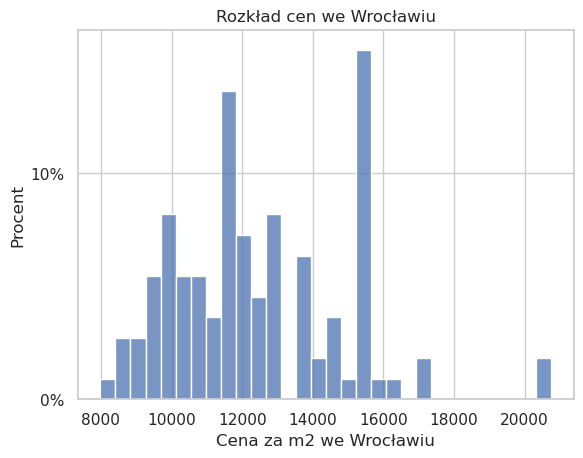

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt
custom_palette = ["#FFB6C1", "#FF69B4", "#FF1493", "#DB7093", "#C71585"]

# Set the color palette
sns.set_palette(custom_palette)
# Assuming data_raw is your DataFrame
sns.set(style="whitegrid")  # Optional: Set the style for the plot

# Create the histogram
ax = sns.histplot(data=data_raw_plot, x='zametr', bins=30, kde=False)

# Customize labels and title
plt.xlabel('Cena za m2 we Wrocławiu')
plt.ylabel('Procent')
plt.title('Rozkład cen we Wrocławiu')

# Show percentages on the y-axis
total_count = len(data_raw['zametr'])
plt.yticks([i for i in range(0, total_count + 1, total_count // 10)],
           [f'{i / total_count * 100:.0f}%' for i in range(0, total_count + 1, total_count // 10)])

# Adjust y-axis limit to the highest box
max_height = max(rect.get_height() for rect in ax.patches) + 1
plt.ylim(0, max_height)

# Show the plot
plt.show()


<Axes: xlabel='powierzchnia', ylabel='Count'>

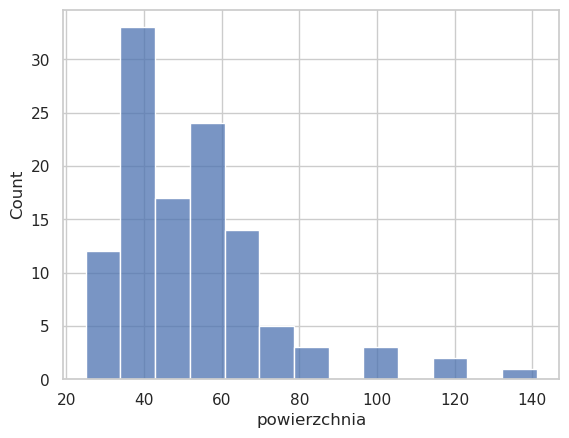

In [137]:
sns.histplot(data_raw['powierzchnia'])

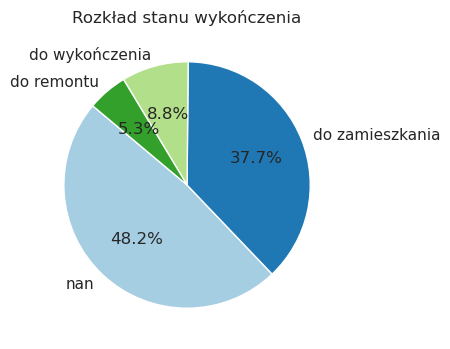

In [138]:

stan_wykonczenia_counts = data_raw['stan wykonczenia'].value_counts(dropna = False)

# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(stan_wykonczenia_counts, labels=stan_wykonczenia_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Rozkład stanu wykończenia')
plt.show()


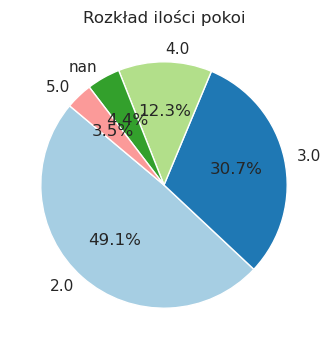

In [139]:
stan_wykonczenia_counts = data_raw['pokoje'].value_counts(dropna = False)

# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(stan_wykonczenia_counts, labels=stan_wykonczenia_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Rozkład ilości pokoi')
plt.show()


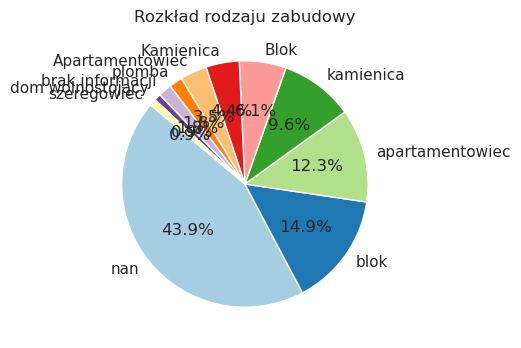

In [140]:
stan_wykonczenia_counts = data_raw['rodzaj zabudowy'].value_counts(dropna = False)

# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(stan_wykonczenia_counts, labels=stan_wykonczenia_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Rozkład rodzaju zabudowy')
plt.show()


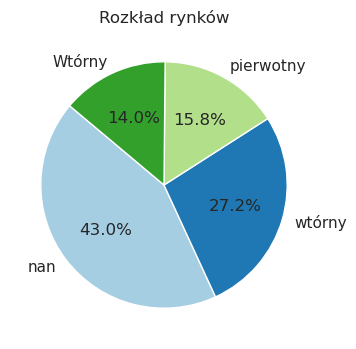

In [141]:
stan_wykonczenia_counts = data_raw['rynek'].value_counts(dropna = False)

# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(stan_wykonczenia_counts, labels=stan_wykonczenia_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Rozkład rynków')
plt.show()


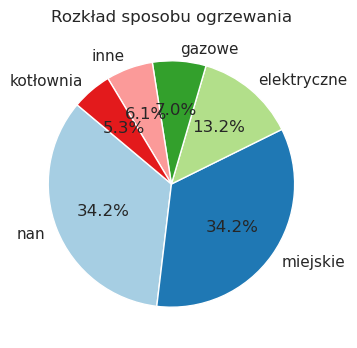

In [142]:
stan_wykonczenia_counts = data_raw['ogrzewanie'].value_counts(dropna = False)

# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(stan_wykonczenia_counts, labels=stan_wykonczenia_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Rozkład sposobu ogrzewania')
plt.show()


In [143]:
data_raw

,nazwa_ogloszenia,cena,opis,lokalizacja,ulica,zametr,pokoje,powierzchnia,umeblowane,czynsz,rodzaj zabudowy,rynek,piętro,liczba pięter,typ,forma wlasnosci,stan wykonczenia,balkon/ogrod/taras,miejsce parkingowe,ogrzewanie
0,2 pokoje z balkonem w Centrum!,640000.00,"Na sprzedaż 2 pokojowe mieszkanie z balkonem w ścisłym centrum Wrocławia.\n\nMieszkanie w pełni rozkładowe 50m2 :\n\n1 pokój dzienny około 20m2\n1 sypialnia około 15m2\nGarderoba\nŁazienka\nKuchnia\n\nMedia:\n\nogrzewanie - sieć miejska\nwoda - piec jednofunkcyjny gazowy\nczynsz- 560 zł ( w tym są już wszystkie zaliczki)\nosobno płatny prąd i gaz ( podgrzanie wody oraz kuchenka)\n\nMieszkanie mieści się na 2 piętrze w budynku bez windy, blok z lat 70. Osiedle jest ogrodzone i zamknięte. Możliwość parkowania na osiedlu tylko dla mieszkańców.\nDodatkowo do mieszkania przynależy piwnica.\nLokal został odświeżony 3 miesiące temu, nie wymaga dodatkowych nakładów finansowych.\nNa chwilę obecną mieszkanie jest wynajmowane, lokatorzy są chętni na jego kontynuowanie :)\n\nLokalizacja nieruchomości ul. Dworcowa\n\nPośredników zapraszam z klientami, nie podpisuję żadnych umów(chyba, że przed finalizacją sprzedaży)- ofertę możecie podesłać swojemu klientowi:) Ewentualne kwestie wynagrodzenia do ustalenia:) Powiedzmy, że jestem z branży :)\n\nPo więcej szczegółów zapraszam do kontaktu.","Wrocław, Stare Miasto",Dworcowa,12800.00,2.0,50.00,Tak,NaN,Blok,Wtórny,2.0,NaN,Prywatne,NaN,NaN,NaN,NaN,NaN
1,Mieszkanie Komuny Paryskiej/Bez pośrednika/2 pokoje/47m2/piwnica,559000.00,"Na sprzedaż 2-pokojowe umeblowane mieszkanie o powierzchni 47m² usytuowane na 4 piętrze w bloku, przy ulicy Komuny Paryskiej we Wrocławiu.\n\nW skład lokalu wchodzi:\n\n- kuchnia z dużym oknem\n\n- pokój\n\n- salon\n\n- przedpokój\n\n- łazienka z wc\n\n- balkon\n\n- piwnica\n\n- schowek na strychu w części wspólnej\n\nMieszkanie umeblowane i wyposażone w sprzęt RTV i AGD\n\n- okna PCV\n\n- ogrzewanie miejskie\n\n- czynsz około 400zł\n\n- pełna własność z księgą wieczystą\n\n- budynek po remoncie klatki schodowej\n\nBardzo dobra lokalizacja oraz komunikacja\n\nRynek ~ 1km\n\nDworzec Główny ~ 1km\n\nLotnisko ~ 13km\n\nGaleria Dominikańska ~ 0.6km\n\nWroclavia ~ 1km\n\nŻabka ~ 150m\n\nW pobliżu apteki, sklepy spożywcze itp\n\nBlisko również przystanki komunikacji miejskiej.\n\nCena: 559 000\n\nZapraszam do kontaktu.","Wrocław, Krzyki",NaN,11893.62,2.0,47.00,Tak,NaN,Blok,Wtórny,4.0,NaN,Prywatne,NaN,NaN,NaN,NaN,NaN
2,"Nowe Żerniki, 3 pokoje z ogromnym tarasem 77m2, wysoki standard",949000.00,"Na sprzedaż piękne, zaprojektowane przez architekta w wysokim standardzie 3-pokojowe mieszkanie znajdujące się na osiedlu Nowe Żerniki (WuWa2), przy ulicy Lauterbacha.\n\nBezpośrednio od właściciela - bez pośredników i BEZ PROWIZJI!\n\nMieszkanie o powierzchni 64,77m2 znajduje się na 1 piętrze i posiada duży, pięknie zagospodarowany taras.\nDo mieszkania przynależą 2 komórki lokatorski (jedna na piętrze obok mieszkania, druga obok miejsc postojowych) oraz 2 zależne miejsca parkingowe w garażu podziemnym. Na osiedlu znajdują się ogólnodostępne miejsca parkingowe blisko budynku. Dostępna jest również rowerownia. Mieszkanie jest podłączone do mediów miejskich.\n\nMieszkanie jest wykończone i składa się z:\n\n- salonu z aneksem kuchennym - 32,31 m2\n- sypialnia I - 11,43 m2\n- sypialnia II - 9,02 m2\n- przedpokój - 8,08 m2\n- łazienka - 3,93 m2\n\n- taras - 77 m2\n\nNa wszystkich oknach (z wyjątkiem salonu) zostały zamontowane plisowane rolety.\n\nWszystkie meble zrobione zostały pod wymiar, łącznie z rozkładanym stołem.\nNa podłodze położona została deska dębowa, zamontowane zostały białe drzwi lakierowane.\nW łazience instalacje podtynkowe z mieszalnikiem termostatycznym.\n\nMieszkanie posiada dużo przestrzeni do przechowywania (liczne szafy, garderobę, regały, pojemniki pod łóżkiem, szuflady)\n\nMieszkanie wykończone pod siebie, nigdy nie było wynajmowane.\n\nDo mieszkania doprowadzony jest światłowód oraz dostępnych jest multum dos

In [144]:
column_name = 'lokalizacja' 
dzielnice = '|'.join(['Fabryczna', 'Krzyki', 'Stare Miasto', 'Śródmieście', 'Psie Pole'])

# Create a new 'dzielnica' column by extracting dzielnica from 'lokalizacja'
data_raw['dzielnica'] = data_raw[column_name].str.extract(f'({dzielnice})')
data_raw.insert(4, 'dzielnica', data_raw.pop('dzielnica'))

data_raw[['lokalizacja', 'dzielnica']]


,lokalizacja,dzielnica
0,"Wrocław, Stare Miasto",Stare Miasto
1,"Wrocław, Krzyki",Krzyki
2,"Wrocław, Fabryczna",Fabryczna
3,"ul. Zielna, Psie Pole, Psie Pole, Wrocław, dolnośląskie",Psie Pole
4,"ul. Kłodnicka, Popowice Południowe, Fabryczna, Wrocław, dolnośląskie",Fabryczna
...,...,...
399,"Wrocław, Fabryczna",Fabryczna
400,"ul. Stefana Żeromskiego, Ołbin, Śródmieście, Wrocław, dolnośląskie",Śródmieście
437,"ul. Woskowa, Brochów, Krzyki, Wrocław, dolnośląskie",Krzyki
470,"Przedmieście Świdnickie, Stare Miasto, Wrocław, dolnośląskie",Stare Miasto


In [149]:
data_raw['pokoje'] = data_raw['pokoje'].fillna(1)

False

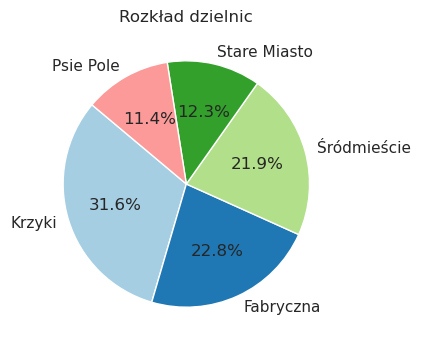

In [145]:
stan_wykonczenia_counts = data_raw['dzielnica'].value_counts(dropna = False)

# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(stan_wykonczenia_counts, labels=stan_wykonczenia_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Rozkład dzielnic')
plt.show()


In [146]:
data_raw['rynek'] = data_raw['rynek'].str.lower()
data_raw.to_csv('./oferty_raw.csv', index = False)